In [17]:
species_abundance <- function(community)  {
  good <- as.numeric(sort(table(community),decreasing = TRUE))
  return(good)
}
species_abundance(c(100,64,63,5,4,3,2,2,1,1,1,1))

[1] 4 2 1 1 1 1 1 1

In [5]:
# Question 15
sum_vect <- function(x, y) {
  if length(x) < length(y):
    
}
c(0,1) + c(1,2)

[1] 1 3

In [15]:
octaves <- function(abundance_vector) {
  abundance <- log2(abundance_vector)
  floor <- floor(take_log) + 1
  class <- tabulate(floor)
  return(class)
}
#octaves(c(100,64,63,5,4,3,2,2,1,1,1,1)) 

[1] 4 3 2 0 0 1 2

In [19]:
sum_vect <- function(x, y) {
  diff <- length(x) - length(y)
    if (diff < 0){
        length(x) <- length(y)
        x[is.na(x)] <- 0
    }
    else {
        length(y) <- length(x)
        y[is.na(y)] <- 0
    }
  return(x+y)      
}
#sum_vect(c(1,3),c(1,0,5,2))

[1] 2 3 5 2

In [1]:
# Question 1
species_richness <- function(community){
  return (length(unique(community)))
}
# species_richness(c(1,4,4,5,1,6,1))

# Question 2
init_community_max <- function(size){
  return (seq(size))
}
# init_community_max(7)

# Question 3
init_community_min <- function(size){
  get_num <- seq(size)
  ini_state <- replace(get_num, get_num != 1, 1)
  return(ini_state)
}
# init_community_min(4)

# Question 4
choose_two <- function(max_value){
  sample(1:max_value, 2, replace = FALSE)
}
#choose_two(4)

# Question 5
neutral_step <- function(community){
  index <- choose_two(length(community))
  community[index[1]] <- community[index[2]]
  return (community)
}
#neutral_step(c(10,5,13))

# Question 6
neutral_generation <- function(community){
  rate <- round(length(community)/2)
  for (i in 1:rate){
    community <- neutral_step(community)
  }
  return(community)
}
#neutral_generation(c(10,5,13))

# Question 7
neutral_time_series <- function(community,duration)  {
  rich <- species_richness(community)
  for (i in 1:duration){
    community <- neutral_generation(community)
    rich <- c(rich,species_richness(community))
  }
  return (rich)
}
#neutral_time_series(community = init_community_max(7) , duration = 20)

# Question 8
question_8 <- function() {
  # clear any existing graphs and plot your graph within the R window
  y <- neutral_time_series (community = init_community_max(100) , duration = 200) 
  x <- c(1:201)
  plot(x,y, main="Species richness over time", ylab="Species Richness", xlab="Generations")
  return("reach equi")
}

# Question 9
neutral_step_speciation <- function(community,speciation_rate)  {
  probability <- runif(1)
  index <- choose_two(length(community))
  if (probability <= speciation_rate){
    new <- max(community) + 1
    community[index[1]] <- new
  }
  else{
    community[index[1]] <- community[index[2]]
  }
  return (community) 
}
#neutral_step_speciation(c(4,7,13,8), 0.2)

# Question 10
neutral_generation_speciation <- function(community,speciation_rate)  {
  rate <- round(length(community)/2)
  for (i in 1:rate){
    community <- neutral_step_speciation(community,speciation_rate)
  }
  return(community)
}
#neutral_generation_speciation(c(4,7,13,8), 0.2)

# Question 11
neutral_time_series_speciation <- function(community,speciation_rate,duration)  {
  rich <- species_richness(community)
  for (i in 1:duration){
    community <- neutral_generation_speciation(community,speciation_rate)
    rich <- c(rich,species_richness(community))
  }
  return (rich)
}
#neutral_time_series_speciation(c(4,7,13,8), 0.2, 100)

# Question 12 ########


In [2]:
question_12 <- function()  {
  # clear any existing graphs and plot your graph within the R window
  min <- neutral_time_series_speciation(init_community_min(100), 0.1, 200)
  max <- neutral_time_series_speciation(init_community_max(100), 0.1, 200)
  x <- c(1:201)
  plot(x,max, main="Species richness over time", 
       ylab="Species Richness", xlab="Generations", 
       col = "blue", type ="l")
  par(new = TRUE)
  plot(x,min, main="Species richness over time", 
       ylab="", xlab="", xaxt = "n", yaxt = "n", 
       col = "red",type ="l")
  return("type your written answer here")
}
# Question 13
species_abundance <- function(community)  {
  good <- as.numeric(sort(table(community),decreasing = TRUE))
  return(good)
}
#species_abundance(c(1,5,3,6,5,6,1,1))

# Question 14
octaves <- function(abundance_vector) {
  abundance <- log2(abundance_vector)
  floor <- floor(abundance) + 1
  class <- tabulate(floor)
  return(class)
}
#octaves(c(100,64,63,5,4,3,2,2,1,1,1,1)) 

# Question 15
sum_vect <- function(x, y) {
  diff <- length(x) - length(y)
    if (diff < 0){
        length(x) <- length(y)
        x[is.na(x)] <- 0
    }
    else {
        length(y) <- length(x)
        y[is.na(y)] <- 0
    }
  return(x+y)      
}
#sum_vect(c(1,3),c(1,0,5,2))

[1] "type your written answer here"

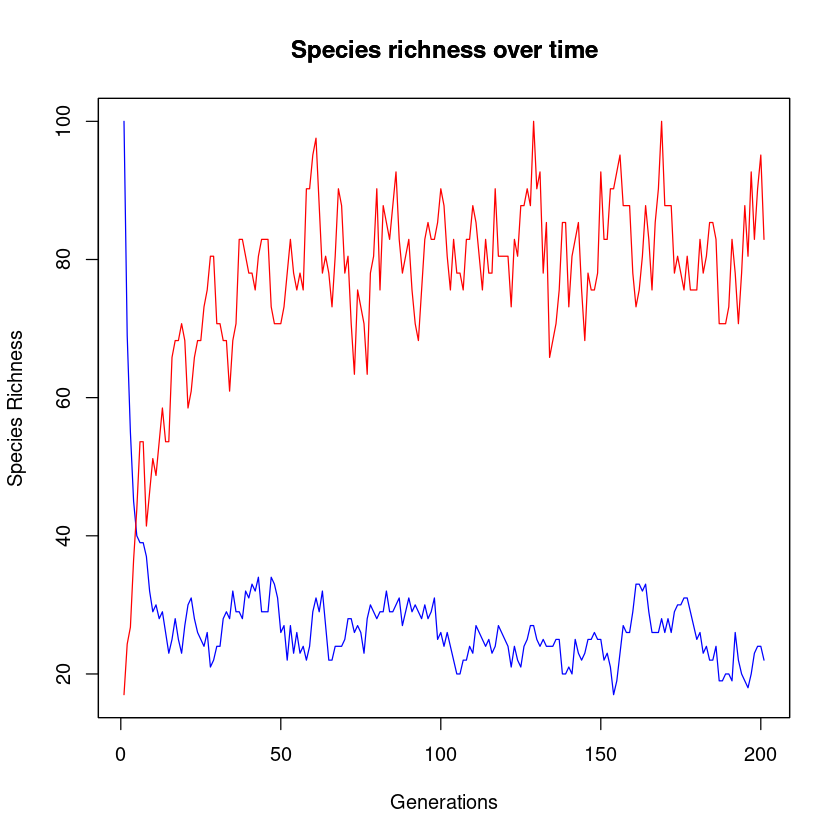

In [44]:
question_12()


[1] "dfjdfjdsf"

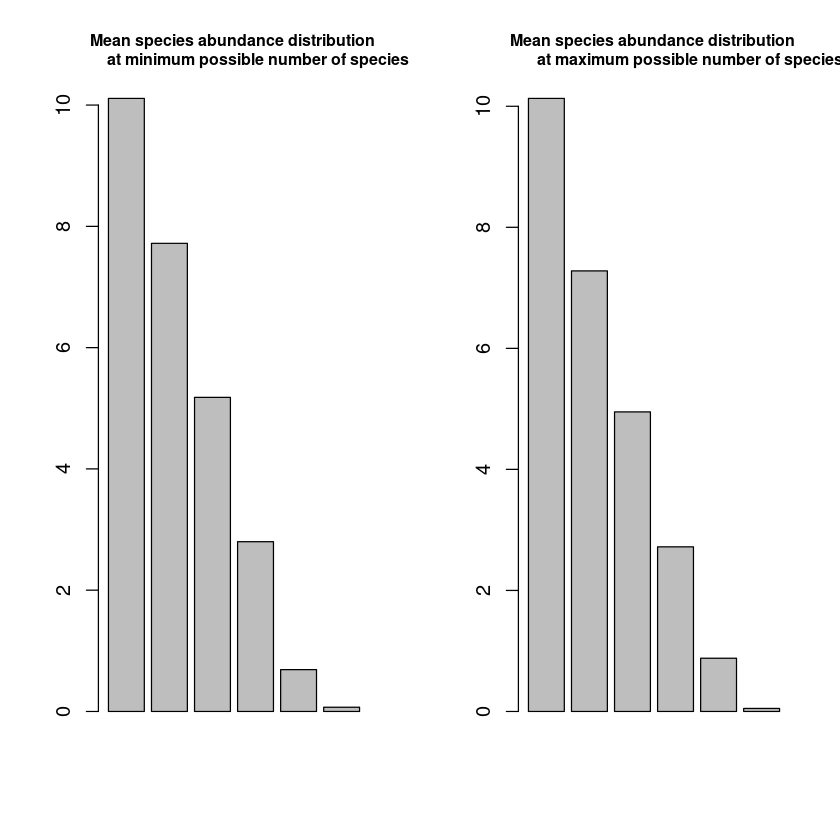

In [3]:
max <- init_community_max(100)
min <- init_community_min(100)
for (i in 1:200){ #burn in period of 200 generations
    max <- neutral_generation_speciation(max, 0.1) 
    min <- neutral_generation_speciation(min, 0.1)
  }
bin_max <- octaves(species_abundance(max))
bin_min <- octaves(species_abundance(min))
for (i in 1:2000){
    max <- neutral_generation_speciation(max, 0.1)
    min <- neutral_generation_speciation(min, 0.1)
     if ((i %% 20) == 0) {
        bin_min <- sum_vect(bin_min,octaves(species_abundance(min)))
        bin_max <- sum_vect(bin_max,octaves(species_abundance(max)))
     }
    }
par(mfrow=c(1,2)#,mai=c(0.5,0.5,0.4,0.3)#
   )
mean_min <- bin_min/100
mean_max <- bin_max/100
barplot(mean_min,
          main = "Mean species abundance distribution 
            at minimum possible number of species", cex.main=0.8)

barplot(mean_max,
          main = "Mean species abundance distribution 
                  at maximum possible number of species", cex.main=0.8)
return("dfjdfjdsf")

In [258]:
rm(list=ls())

In [273]:
D <- log(64)/log(6)

[1] "Sierpiński triangle"

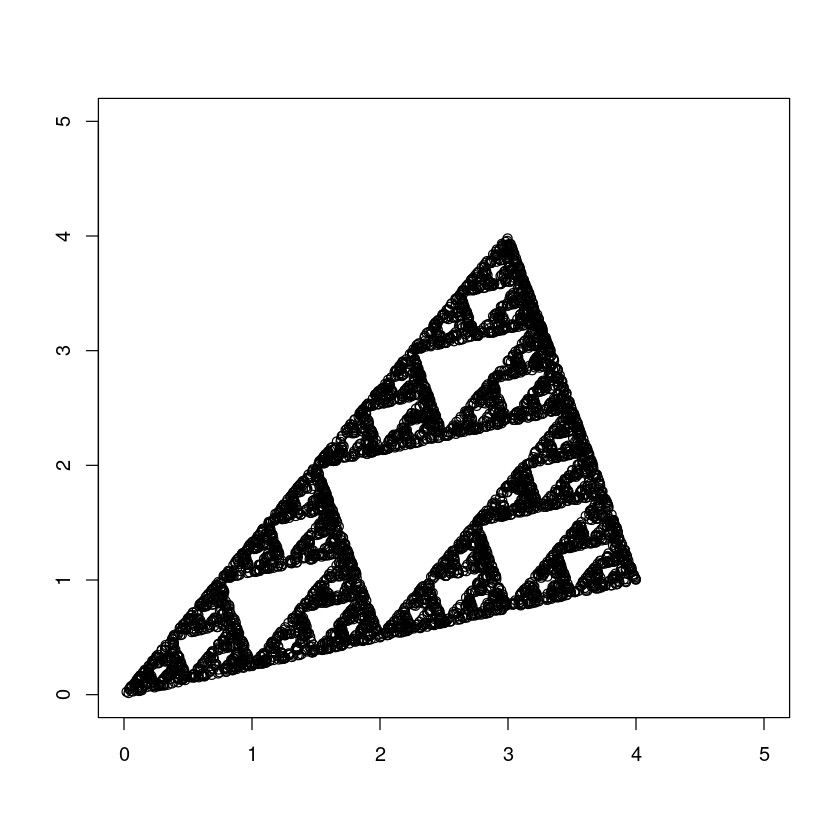

In [4]:
pt <- data.frame(A=c(0,0),B=c(3,4),C=c(4,1))
  x <- c(0,0)
  plot(x, type = "n", ylab = "", xlab = "", xlim = c(0,5), ylim = c(0,5))
  points(0,0,cex = 0.1)
  for (i in 1:5000){
    rd <- pt[, sample(ncol(pt), size=1)]
    x[1] <- x[1] + (rd[1]-x[1])/2
    x[2] <- x[2] + (rd[2]-x[2])/2
    points(x[1],x[2])
}
  return("Sierpiński triangle")

In [5]:
turtle <- function(start_position, direction, length)  {
  #plot(0, 0, ylab = "", xlab = "", xlim = c(0,5), ylim = c(0,5)) 
  sp1 <- start_position[1]
  sp2 <- start_position[2]
  np1 <- length * cos(direction)
  np2 <- length * sin(direction)
  segments(sp1, sp2, np1, np2)
  ep <- c(np1,np2)
  return(ep)
}

In [6]:
cluster_run <- function(speciation_rate, size, wall_time, interval_rich, 
                        interval_oct, burn_in_generations, output_file_name)  {
    community <- init_community_min(size)
    ab <- c()
    oc <- list()
    wall_time <- wall_time*60
    tm <- proc.time()[[3]]
    while (proc.time()[[3]] - tm <= wall_time){
        community <- neutral_generation_speciation(community, speciation_rate)
        for (i in 1:burn_in_generations){
            if (i %% interval_rich == 0){
               ab <- c(ab, species_richness(community))
            }
            if (i %% interval_oct){
               oc <- append(oc, list(octaves(species_abundance(community))))
            }
        } 
    }
    parameters <- c(speciation_rate, size, wall_time, interval_rich, interval_oct, burn_in_generations)
    total_time <- proc.time()[3] - tm
    save(ab, oc, community, total_time, parameters, file = output_file_name)
    }

cluster_run(speciation_rate = 0.1, size=100, wall_time=10, interval_rich=1,
interval_oct=10, burn_in_generations=200,output_file_name="my_test_file_2.rda")

In [9]:
rm(list=ls()) # good practice 
graphics.off()
source("atn21_HPC_2021_main.R")
#iter <- as.numeric(Sys.getenv("PBS_ARRAY_INDEX"))
iter <- 3

if ((iter >= 1) & (iter <= 25)){
  size = 500
}
if ((iter > 25) & (iter <= 50)){
  size = 1000
}
if ((iter > 50) & (iter <= 75)){
  size = 2500
}
if ((iter > 75) & (iter <= 100)){
  size = 5000
}
wall_time <- 11.5*60
speciation_rate <- 0.002216
output_file_name <- paste("Cluster_run_iteration",iter,".rda",sep = "_")
# call cluster_run function with personal speciation_rate = 0.002216
cluster_run(speciation_rate, size, wall_time, interval_rich = 1, interval_oct = size/10, burn_in_generations = 8*size, output_file_name)

ERROR: Error in octaves(species_abundance(community)): object 'take_log' not found


In [425]:
x <- function(b){
    return (b*1)
}
b <- 1
x(3)

[1] 3